# Lab | Revisiting Machine Learning Case Study

In this lab, you will use learningSet.csv file which you already have cloned in previous activities: "Healthcare for All" dataset


### Instructions

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

1) Check for null values in the numerical columns.

2) Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

3) Use appropriate EDA technique where ever necessary.

In [110]:
# Prepare the toolbox

import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from math import floor

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Import dataset

df = pd.read_csv('../learningSet.csv')

In [7]:
dfnan = df.select_dtypes('number').isna().sum()
NaN_columns = dfnan[dfnan>0].index
NaN_columns

Index(['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS',
       'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN',
       'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2',
       'MSA', 'ADI', 'DMA', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6',
       'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12',
       'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18',
       'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24',
       'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8',
       'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14',
       'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20',
       'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4',
       'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10',
       'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16',
    

In [26]:
to_clean = ['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']

In [46]:
pd.DataFrame(
    df[to_clean].isna().sum(), columns=['NaN_count']
).join(
    pd.DataFrame(round(df[to_clean].isna().sum()*100/len(df),2), columns=['%']))

,NaN_count,%
GEOCODE2,132,0.14
WEALTH1,44732,46.88
ADI,132,0.14
DMA,132,0.14
MSA,132,0.14


In [81]:
# GEOCODE2, ADI, DMA and MSA are all providing geographical information. 
    # The percentage of missing values is negligible. Those rows could be simply dropped.
# WEALTH1 is missing almost half of the values, too much to just drop it. However, there is another wealth metric: WEALTH2.

df[['WEALTH1','WEALTH2']].notna()

,WEALTH1,WEALTH2
0,False,True
1,True,True
2,True,True
3,True,True
4,True,False
...,...,...
95407,False,False
95408,True,False
95409,False,False
95410,False,True


In [124]:
# If we could somehow combine the information of 'WEALTH1' and 'WEALTH2' and remove rows without wealth data, 
# how much would be lost?

mask = df['WEALTH1'].notna()+df['WEALTH2'].notna() # vector signaling at least 1 wealth metric

print(len(df)-sum(mask), 'lost rows out of', len(df))
print('data loss =', 100-round(sum(mask)*100/len(df),2),'%')
# More reasonable, but still a considerable loss.

21843 lost rows out of 95412
data loss = 22.89 %


In [94]:
# How many times both 'WEALTH1' and 'WEALTH2' metrics actually coincide?

hard_mask = df['WEALTH1'].notna()*df['WEALTH2'].notna() # vector signaling 2 wealth metrics

print('Coincidence between WEALTH1 and WEALTH2 =', 
      round(sum(df['WEALTH1'][hard_mask]==df['WEALTH2'][hard_mask])*100/sum(hard_mask),2), '%')

Coincidence between WEALTH1 and WEALTH2 = 64.83 %


In [100]:
# Are there clear collinearities between 'WEALTH1','WEALTH2' and maybe other wealth proxies?

corr_mat = df[['WEALTH1','WEALTH2','INCOME']].corr(method='spearman')
corr_mat # There is a GREAT correlation between 'WEALTH1' and 'WEALTH2', so we don't need both. We could combine them!

,WEALTH1,WEALTH2,INCOME
WEALTH1,1.000000,0.872854,0.462701
WEALTH2,0.872854,1.000000,0.409420
INCOME,0.462701,0.409420,1.000000


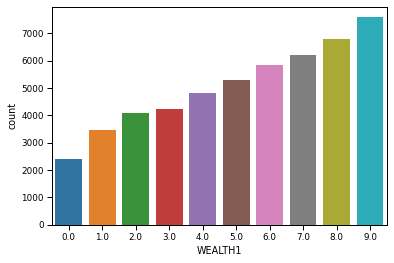

In [101]:
sns.countplot(x=df['WEALTH1'])
plt.show()

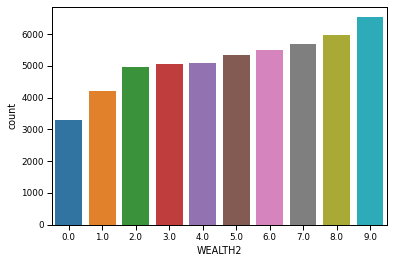

In [102]:
sns.countplot(x=df['WEALTH2'])
plt.show()

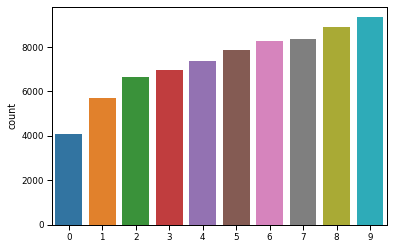

In [120]:
# OPTION A: Get the mean of both wealth metrics and drop NaN, assuming a data loss of 22.89% (21843 rows).

sns.countplot(x=df[['WEALTH1','WEALTH2']].mean(axis=1).dropna().apply(lambda avg: floor(avg)))
plt.show()

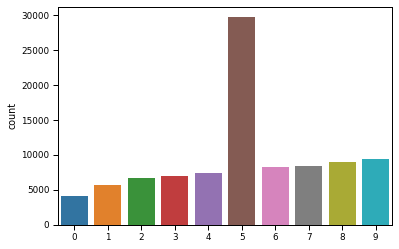

In [128]:
# OPTION B: Fill NaN with a median value and hope for the best...

sns.countplot(x=df[['WEALTH1','WEALTH2']].mean(axis=1).fillna(
    floor(df[['WEALTH1','WEALTH2']].mean().mean() # Fill NaN with average wealth
         )).apply(lambda avg: floor(avg)))
plt.show() # No data loss, but it looks like it's giving us the finger...